<a href="https://colab.research.google.com/github/GRINFREM/Multivariate-Statistics/blob/main/msgc_661_initial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
df = pd.read_csv('spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## Preprocessing

In [3]:
## Missing values
display(df.isna().sum())
na_rows = df[df.isna().any(axis=1)]
print("Rows with na values: ", na_rows.shape[0])
print(f"Percentage of rows with na values: {na_rows.shape[0]/df.shape[0]:.2%}")

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

Rows with na values:  5
Percentage of rows with na values: 0.02%


In [4]:
df_clean = df.dropna()

In [5]:
duplicates = df_clean.duplicated().sum()
print(duplicates)

0


In [6]:
duplicated_track_id = df_clean[df_clean.duplicated(subset=['track_id'], keep=False)]
display(duplicated_track_id.sort_values(by='track_id'))

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32084,00Gu3RMpDW2vO9PjlMVFDL,Hide Away (feat. Envy Monroe),Blasterjaxx,42,5pqG85igfoeWcCDIsSi9x7,Hide Away (feat. Envy Monroe),2019-06-21,Epic Bass Drops | Best House Mixes,4IS7o1utOzhimFEFnj9gmu,edm,...,10,-4.894,1,0.0421,0.0249,0.000000,0.3610,0.134,130.001,188000
28696,00Gu3RMpDW2vO9PjlMVFDL,Hide Away (feat. Envy Monroe),Blasterjaxx,42,5pqG85igfoeWcCDIsSi9x7,Hide Away (feat. Envy Monroe),2019-06-21,Big Room EDM - by Spinnin' Records,7xWdFCrU5Gka6qp1ODrSdK,edm,...,10,-4.894,1,0.0421,0.0249,0.000000,0.3610,0.134,130.001,188000
9387,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,59,1jg2UPoSAr7CDPsEXcabo1,Fast & Furious 6,2013-01-01,RAP Gangsta,1Z1gW89x4MSBjkvVjGg7DQ,rap,...,8,-4.573,1,0.4080,0.0521,0.000000,0.0568,0.552,171.966,227893
23850,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,59,1jg2UPoSAr7CDPsEXcabo1,Fast & Furious 6,2013-01-01,Today's Hits (Clean),7ENISpOJhocpMJVcGb0qcT,r&b,...,8,-4.573,1,0.4080,0.0521,0.000000,0.0568,0.552,171.966,227893
28968,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,59,1jg2UPoSAr7CDPsEXcabo1,Fast & Furious 6,2013-01-01,Locker Room,37i9dQZF1DX8SaiEt4OVJw,edm,...,8,-4.573,1,0.4080,0.0521,0.000000,0.0568,0.552,171.966,227893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32074,7zHrHnVSQwI95FGHewXDl8,Do Bad Well (feat. Nevve),KSHMR,62,3BAigRfKg2iyWJuWlZCZZQ,Do Bad Well (feat. Nevve),2019-10-11,Epic Bass Drops | Best House Mixes,4IS7o1utOzhimFEFnj9gmu,edm,...,5,-4.755,1,0.1130,0.0512,0.000315,0.2340,0.415,127.964,204375
28932,7zHrHnVSQwI95FGHewXDl8,Do Bad Well (feat. Nevve),KSHMR,62,3BAigRfKg2iyWJuWlZCZZQ,Do Bad Well (feat. Nevve),2019-10-11,Bounce United,08QTrfsYYouffgnPjmllAQ,edm,...,5,-4.755,1,0.1130,0.0512,0.000315,0.2340,0.415,127.964,204375
2850,7zsXy7vlHdItvUSH8EwQss,Cold Water,Major Lazer,69,3Kmo85mapQ2wTaCAHBkKsK,Cold Water,2016-07-22,ElectroPop 2020,4frhr6RQM2fMOm2mpvOVo6,pop,...,6,-5.092,0,0.0432,0.0736,0.000000,0.1560,0.501,92.943,185360
20517,7zsXy7vlHdItvUSH8EwQss,Cold Water,Major Lazer,69,3Kmo85mapQ2wTaCAHBkKsK,Cold Water,2016-07-22,Latin/Hip Hop/Dancehall/Soca,2rg9LCyvaMQvnCE2hVndpR,latin,...,6,-5.092,0,0.0432,0.0736,0.000000,0.1560,0.501,92.943,185360


It looks like the rows that have the same track_id are only different when it comes to the playlist (only playlist_name, playlist_id, playlist_subgenre are different). We don't care about the name and id, however we would like to keep all genres that the track is applicable to.

In [7]:
# Group by track_id and aggregate playlist_genre and playlist_subgenre into lists
aggregated_genres = df_clean.groupby('track_id').agg({
    'playlist_genre': lambda x: list(x.unique()),
    'playlist_subgenre': lambda x: list(x.unique())
}).reset_index()

# Drop unnecessary columns from the original dataframe and keep the first occurrence of each track_id
df_unique_tracks = df_clean.drop(['playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre'], axis=1).drop_duplicates(subset=['track_id'])

# Merge the aggregated genres with the unique tracks dataframe
df_processed = pd.merge(df_unique_tracks, aggregated_genres, on='track_id')

# Display the result
display(df_processed.head())

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_genre,playlist_subgenre
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,0.748,0.916,6,...,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,"[pop, edm]","[dance pop, pop edm]"
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,0.726,0.815,11,...,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,"[pop, edm]","[dance pop, pop edm]"
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,0.675,0.931,1,...,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,"[pop, edm]","[dance pop, big room, pop edm]"
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,0.718,0.930,7,...,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,[pop],[dance pop]
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,0.650,0.833,1,...,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,[pop],[dance pop]


## Popularity Analysis

In [8]:
df_processed['track_popularity'].describe()

count    28352.000000
mean        39.335320
std         23.699443
min          0.000000
25%         21.000000
50%         42.000000
75%         58.000000
max        100.000000
Name: track_popularity, dtype: float64

In [9]:
df_processed.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'playlist_genre', 'playlist_subgenre'],
      dtype='object')

In [10]:
df_processed = df_processed.drop(columns = ['playlist_subgenre'])

In [11]:
# Explode the playlist_genre column to have one row per genre per track
df_genres_exploded = df_processed.explode('playlist_genre')

# Create dummy variables from the exploded genre column
df_genre_dummies = pd.get_dummies(df_genres_exploded['playlist_genre'], prefix='genre')

# Concatenate the dummy variables with the original dataframe (dropping the original genre column)
df_processed = pd.concat([df_processed.drop(columns=['playlist_genre']), df_genre_dummies], axis=1)

# Aggregate the dummy variables back by track_id, summing up the dummy columns
df_processed = df_processed.groupby(df_processed.columns.drop(df_genre_dummies.columns).tolist(), as_index=False)[df_genre_dummies.columns].sum()

# Ensure that the summed dummy variables are binary (0 or 1)
for col in df_genre_dummies.columns:
    df_processed[col] = df_processed[col].clip(upper=1)

# Display the first few rows and columns to verify the changes
display(df_processed.head())
display(df_processed.columns)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,danceability,energy,key,...,liveness,valence,tempo,duration_ms,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,0.682,0.401,2,...,0.0887,0.566,97.091,235440,0,0,0,0,0,1
1,002xjHwzEx66OWFV2IP9dk,The Others,RIKA,15,1ficfUnZMaY1QkNp15Slzm,The Others,2018-01-26,0.582,0.704,5,...,0.2120,0.698,150.863,197286,0,0,0,1,0,0
2,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,0.303,0.880,9,...,0.3470,0.404,135.225,373512,0,0,0,0,0,1
3,008MceT31RotUANsKuzy3L,Liquid Blue,The.madpix.project,24,1Z4ANBVuhTlS6DprlP0m1q,Liquid Blue,2015-08-07,0.659,0.794,10,...,0.3220,0.852,128.041,228565,0,0,1,0,0,0
4,008rk8F6ZxspZT4bUlkIQG,Fever,YOSA & TAAR,38,2BuYm9UcKvI0ydXs5JKwt0,Fever,2018-11-16,0.662,0.838,1,...,0.0881,0.496,129.884,236308,0,0,1,0,0,0


Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'genre_edm', 'genre_latin', 'genre_pop', 'genre_r&b',
       'genre_rap', 'genre_rock'],
      dtype='object')

In [12]:
intrinsic_features = [col for col in df_processed.columns if col not in ['track_id', 'track_name', 'track_popularity', 'playlist_id', 'playlist_name', 'track_artist', 'track_album_release_date', 'track_album_id', 'track_album_name']]
display(df_processed[intrinsic_features].describe())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock
count,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000
mean,0.653375,0.698373,5.367417,-6.817777,0.565533,0.107939,0.177192,0.091129,0.190955,0.510386,120.958219,226574.631102,0.195295,0.163622,0.181010,0.181222,0.193390,0.156991
std,0.145791,0.183508,3.613743,3.036433,0.495696,0.102547,0.222814,0.232562,0.155888,0.234344,26.954502,61081.363704,0.396435,0.369938,0.385033,0.385209,0.394963,0.363798
min,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.561000,0.579000,2.000000,-8.310250,0.000000,0.041000,0.014300,0.000000,0.092600,0.329000,99.972000,187741.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.670000,0.722000,6.000000,-6.261000,1.000000,0.062600,0.079700,0.000021,0.127000,0.512000,121.993500,216933.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.760000,0.843000,9.000000,-4.708750,1.000000,0.133000,0.260000,0.006573,0.249000,0.695000,133.999000,254975.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
threshold = np.linspace(99, 50, 50)
density_dict = {}
for th in threshold:
  density_dict[int(th)] = df_processed[df_processed['track_popularity'] >= int(th)].shape[0]/df_processed.shape[0]

display(density_dict)

{99: 7.054176072234762e-05,
 98: 0.0002468961625282167,
 97: 0.00035270880361173816,
 96: 0.00038797968397291194,
 95: 0.0004585214446952596,
 94: 0.0006348758465011287,
 93: 0.0008817720090293454,
 92: 0.0010581264108352145,
 91: 0.0014108352144469526,
 90: 0.0019751693002257337,
 89: 0.002257336343115124,
 88: 0.003244920993227991,
 87: 0.004020880361173815,
 86: 0.005043735891647856,
 85: 0.006313487584650113,
 84: 0.007794864559819413,
 83: 0.01026382618510158,
 82: 0.012274266365688487,
 81: 0.014919582392776524,
 80: 0.0179176072234763,
 79: 0.02253809255079007,
 78: 0.02726439051918736,
 77: 0.033542607223476295,
 76: 0.040632054176072234,
 75: 0.04743933408577878,
 74: 0.0557632618510158,
 73: 0.06391083521444696,
 72: 0.07244638826185101,
 71: 0.08246331828442438,
 70: 0.092938769751693,
 69: 0.10482505643340857,
 68: 0.11611173814898419,
 67: 0.1288797968397291,
 66: 0.14118933408577877,
 65: 0.15469808126410836,
 64: 0.16746613995485327,
 63: 0.18164503386004516,
 62: 0.1957

In [14]:
df_dict = {}

for th in threshold:
  df_dict[th] = df_processed.copy()
  df_dict[th]['track_popularity'] = df_dict[th]['track_popularity'].apply(lambda x: 1 if x >= th else 0)


In [15]:
from sklearn.linear_model import LogisticRegression

R2_list = []

for th in threshold:
  X = df_dict[th][intrinsic_features]
  y = df_dict[th]['track_popularity']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Logistic regression
  clf = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
  clf.fit(X_train, y_train)

  # Predicted probabilities for the model
  p_model = clf.predict_proba(X_train)[:, 1]

  # Log-likelihood of the model
  ll_model = np.sum(y_train * np.log(p_model) + (1 - y_train) * np.log(1 - p_model))

  # Log-likelihood of null model (intercept only)
  p_null = np.mean(y_train)
  ll_null = np.sum(y_train * np.log(p_null) + (1 - y_train) * np.log(1 - p_null))

  # McFadden's pseudo-R²
  pseudo_r2 = 1 - (ll_model / ll_null)

  R2_list.append(pseudo_r2)

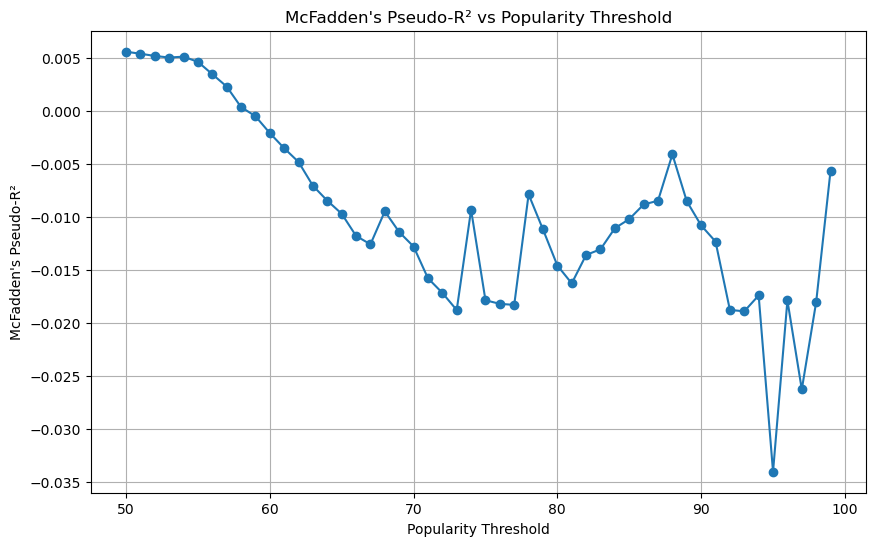

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(threshold, R2_list, marker='o', linestyle='-')
plt.title('McFadden\'s Pseudo-R² vs Popularity Threshold')
plt.xlabel('Popularity Threshold')
plt.ylabel('McFadden\'s Pseudo-R²')
plt.grid(True)
plt.show()

In [17]:
df_processed['track_popularity'] = df_processed['track_popularity'].apply(lambda x: 1 if x >= 50 else 0)

In [18]:
# Train test split
X = df_processed[intrinsic_features]
y = df_processed['track_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Logistic Regression
glm_train = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
glm_results = glm_train.fit()
print(glm_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:       track_popularity   No. Observations:                22681
Model:                            GLM   Df Residuals:                    22662
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13969.
Date:                Sat, 18 Oct 2025   Deviance:                       27938.
Time:                        15:12:54   Pearson chi2:                 2.29e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.09689
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1740      0.197  

In [19]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print("Shape of X_train after undersampling:", X_resampled.shape)
print("Shape of y_train after undersampling:", y_resampled.shape)
print("\nValue counts of y_train after undersampling:")
print(y_resampled.value_counts())

Shape of X_train after undersampling: (17502, 18)
Shape of y_train after undersampling: (17502,)

Value counts of y_train after undersampling:
track_popularity
0    8751
1    8751
Name: count, dtype: int64


In [20]:
# Train the logistic regression model on the undersampled training data
glm_resampled = sm.GLM(y_resampled, sm.add_constant(X_resampled), family=sm.families.Binomial())
glm_results_resampled = glm_resampled.fit()
print(glm_results_resampled.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       track_popularity   No. Observations:                17502
Model:                            GLM   Df Residuals:                    17483
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11207.
Date:                Sat, 18 Oct 2025   Deviance:                       22415.
Time:                        15:12:54   Pearson chi2:                 1.77e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1002
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3650      0.220  

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model on the undersampled training set
y_pred_train_resampled = glm_results_resampled.predict(sm.add_constant(X_resampled))
y_pred_train_binary_resampled = (y_pred_train_resampled > 0.5).astype(int)

accuracy_train_resampled = accuracy_score(y_resampled, y_pred_train_binary_resampled)
precision_train_resampled = precision_score(y_resampled, y_pred_train_binary_resampled)
recall_train_resampled = recall_score(y_resampled, y_pred_train_binary_resampled)
f1_train_resampled = f1_score(y_resampled, y_pred_train_binary_resampled)

print("Model Evaluation on Undersampled Training Set:")
print(f"Accuracy: {accuracy_train_resampled:.4f}")
print(f"Precision: {precision_train_resampled:.4f}")
print(f"Recall: {recall_train_resampled:.4f}")
print(f"F1 Score: {f1_train_resampled:.4f}")

# Evaluate the model on the original test set
y_pred_test_resampled = glm_results_resampled.predict(sm.add_constant(X_test))
y_pred_test_binary_resampled = (y_pred_test_resampled > 0.5).astype(int)

accuracy_test_resampled = accuracy_score(y_test, y_pred_test_binary_resampled)
precision_test_resampled = precision_score(y_test, y_pred_test_binary_resampled)
recall_test_resampled = recall_score(y_test, y_pred_test_binary_resampled)
f1_test_resampled = f1_score(y_test, y_pred_test_binary_resampled)

print("\nModel Evaluation on Original Test Set:")
print(f"Accuracy: {accuracy_test_resampled:.4f}")
print(f"Precision: {precision_test_resampled:.4f}")
print(f"Recall: {recall_test_resampled:.4f}")
print(f"F1 Score: {f1_test_resampled:.4f}")

Model Evaluation on Undersampled Training Set:
Accuracy: 0.6234
Precision: 0.6150
Recall: 0.6597
F1 Score: 0.6366

Model Evaluation on Original Test Set:
Accuracy: 0.6196
Precision: 0.5127
Recall: 0.6532
F1 Score: 0.5745


In [22]:
drop_cols = ['key', 'mode', 'speechiness', 'liveness', 'valence']
X_train = X_train.drop(columns = drop_cols)
X_test = X_test.drop(columns = drop_cols)
# Logistic Regression
glm_train = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
glm_results = glm_train.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       track_popularity   No. Observations:                22681
Model:                            GLM   Df Residuals:                    22667
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13973.
Date:                Sat, 18 Oct 2025   Deviance:                       27946.
Time:                        15:12:54   Pearson chi2:                 2.29e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.09659
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1555      0.192  

In [23]:
# Train the logistic regression model on the undersampled training data for the second model
X_resampled_dropped = X_resampled.drop(columns = drop_cols)
glm_resampled_2 = sm.GLM(y_resampled, sm.add_constant(X_resampled_dropped), family=sm.families.Binomial())
glm_results_resampled_2 = glm_resampled_2.fit()
print(glm_results_resampled_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       track_popularity   No. Observations:                17502
Model:                            GLM   Df Residuals:                    17488
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11214.
Date:                Sat, 18 Oct 2025   Deviance:                       22428.
Time:                        15:12:54   Pearson chi2:                 1.77e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.09953
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3900      0.214  

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the glm_resampled_2 model on the undersampled training set
y_pred_train_binary_resampled_2 = (glm_results_resampled_2.predict(sm.add_constant(X_resampled_dropped)) > 0.5).astype(int)

accuracy_train_resampled_2 = accuracy_score(y_resampled, y_pred_train_binary_resampled_2)
precision_train_resampled_2 = precision_score(y_resampled, y_pred_train_binary_resampled_2)
recall_train_resampled_2 = recall_score(y_resampled, y_pred_train_binary_resampled_2)
f1_train_resampled_2 = f1_score(y_resampled, y_pred_train_binary_resampled_2)

print("Model Evaluation on Undersampled Training Set (glm_resampled_2):")
print(f"Accuracy: {accuracy_train_resampled_2:.4f}")
print(f"Precision: {precision_train_resampled_2:.4f}")
print(f"Recall: {recall_train_resampled_2:.4f}")
print(f"F1 Score: {f1_train_resampled_2:.4f}")

# Evaluate the glm_resampled_2 model on the original test set
y_pred_test_binary_resampled_2 = (glm_results_resampled_2.predict(sm.add_constant(X_test)) > 0.5).astype(int)

accuracy_test_resampled_2 = accuracy_score(y_test, y_pred_test_binary_resampled_2)
precision_test_resampled_2 = precision_score(y_test, y_pred_test_binary_resampled_2)
recall_test_resampled_2 = recall_score(y_test, y_pred_test_binary_resampled_2)
f1_test_resampled_2 = f1_score(y_test, y_pred_test_binary_resampled_2)

print("\nModel Evaluation on Original Test Set (glm_resampled_2):")
print(f"Accuracy: {accuracy_test_resampled_2:.4f}")
print(f"Precision: {precision_test_resampled_2:.4f}")
print(f"Recall: {recall_test_resampled_2:.4f}")
print(f"F1 Score: {f1_test_resampled_2:.4f}")

Model Evaluation on Undersampled Training Set (glm_resampled_2):
Accuracy: 0.6247
Precision: 0.6159
Recall: 0.6627
F1 Score: 0.6384

Model Evaluation on Original Test Set (glm_resampled_2):
Accuracy: 0.6214
Precision: 0.5144
Recall: 0.6555
F1 Score: 0.5764


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from category_encoders import CountEncoder

# Add track_artist to intrinsic_features for encoding
intrinsic_features_with_artist = [col for col in df_processed.columns if col not in ['track_id', 'track_name', 'track_popularity', 'playlist_id', 'playlist_name', 'track_album_release_date', 'track_album_id', 'track_album_name']]

# Separate features and target
X_artist = df_processed[intrinsic_features_with_artist]
y_artist = df_processed['track_popularity']

# Train test split
X_artist_train, X_artist_test, y_artist_train, y_artist_test = train_test_split(X_artist, y_artist, test_size=0.2, random_state=42)

# Apply Count Encoding to the 'track_artist' column
ce = CountEncoder(cols=['track_artist'])
X_artist_train = ce.fit_transform(X_artist_train)
X_artist_test = ce.transform(X_artist_test) # Use transform on the test set to avoid data leakage

# Drop the original 'track_artist' column as it's now encoded
X_artist_train = X_artist_train.drop(columns = drop_cols + ['track_artist'], errors='ignore')
X_artist_test = X_artist_test.drop(columns = drop_cols + ['track_artist'], errors='ignore')


# Use RandomUnderSampler on the training data
rus = RandomUnderSampler(random_state=42)
X_artist_resampled, y_artist_resampled = rus.fit_resample(X_artist_train, y_artist_train)

# Convert boolean columns to integers
for col in X_artist_resampled.columns:
    if X_artist_resampled[col].dtype == 'bool':
        X_artist_resampled[col] = X_artist_resampled[col].astype(int)

print("Shape of X_artist_train after undersampling:", X_artist_resampled.shape)
print("Shape of y_artist_train after undersampling:", y_artist_resampled.shape)
print("\nValue counts of y_artist_train after undersampling:")
print(y_artist_resampled.value_counts())

# Train the logistic regression model on the undersampled training data with artist features
glm_resampled_artist = sm.GLM(y_artist_resampled, sm.add_constant(X_artist_resampled), family=sm.families.Binomial())
glm_results_resampled_artist = glm_resampled_artist.fit()
print(glm_results_resampled_artist.summary())


# Evaluate the glm_resampled_artist model on the undersampled training set
y_pred_train_binary_resampled_artist = (glm_results_resampled_artist.predict(sm.add_constant(X_artist_resampled)) > 0.5).astype(int)

accuracy_train_resampled_artist = accuracy_score(y_artist_resampled, y_pred_train_binary_resampled_artist)
precision_train_resampled_artist = precision_score(y_artist_resampled, y_pred_train_binary_resampled_artist)
recall_train_resampled_artist = recall_score(y_artist_resampled, y_pred_train_binary_resampled_artist)
f1_train_resampled_artist = f1_score(y_artist_resampled, y_pred_train_binary_resampled_artist)

print("\nModel Evaluation on Undersampled Training Set (glm_resampled_artist):")
print(f"Accuracy: {accuracy_train_resampled_artist:.4f}")
print(f"Precision: {precision_train_resampled_artist:.4f}")
print(f"Recall: {recall_train_resampled_artist:.4f}")
print(f"F1 Score: {f1_train_resampled_artist:.4f}")

# Evaluate the glm_resampled_artist model on the original test set
# Align columns of test set with training set after one-hot encoding
X_artist_test_aligned = X_artist_test.reindex(columns = X_artist_resampled.columns, fill_value=0)

# Convert boolean columns to integers in the test set as well
for col in X_artist_test_aligned.columns:
    if X_artist_test_aligned[col].dtype == 'bool':
        X_artist_test_aligned[col] = X_artist_test_aligned[col].astype(int)

y_pred_test_binary_resampled_artist = (glm_results_resampled_artist.predict(sm.add_constant(X_artist_test_aligned)) > 0.5).astype(int)


accuracy_test_resampled_artist = accuracy_score(y_artist_test, y_pred_test_binary_resampled_artist)
precision_test_resampled_artist = precision_score(y_artist_test, y_pred_test_binary_resampled_artist)
recall_test_resampled_artist = recall_score(y_artist_test, y_pred_test_binary_resampled_artist)
f1_test_resampled_artist = f1_score(y_artist_test, y_pred_test_binary_resampled_artist)

print("\nModel Evaluation on Original Test Set (glm_resampled_artist):")
print(f"Accuracy: {accuracy_test_resampled_artist:.4f}")
print(f"Precision: {precision_test_resampled_artist:.4f}")
print(f"Recall: {recall_test_resampled_artist:.4f}")
print(f"F1 Score: {f1_test_resampled_artist:.4f}")

Shape of X_artist_train after undersampling: (17502, 13)
Shape of y_artist_train after undersampling: (17502,)

Value counts of y_artist_train after undersampling:
track_popularity
0    8751
1    8751
Name: count, dtype: int64
                 Generalized Linear Model Regression Results                  
Dep. Variable:       track_popularity   No. Observations:                17502
Model:                            GLM   Df Residuals:                    17488
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11214.
Date:                Sat, 18 Oct 2025   Deviance:                       22428.
Time:                        15:12:54   Pearson chi2:                 1.77e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.09953
Covariance Type:            nonrobust                         